In [1]:
# importing the libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))    

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9635
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0259 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

In [13]:
score = model.evaluate(X_train, y_train)
print("Training loss : ", score[0])
print("Training loss : ", score[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070 - accuracy: 0.9978
Training loss :  0.007007904350757599
Training loss :  0.9978166818618774


In [14]:
score = model.evaluate(X_test, y_test)
print("Testing loss : ", score[0])
print("Testing loss : ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9862
Testing loss :  0.09370795637369156
Testing loss :  0.9861999750137329


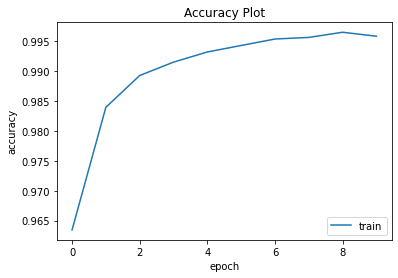

In [15]:
plt.plot(hist.history['accuracy'])
plt.title("Accuracy Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

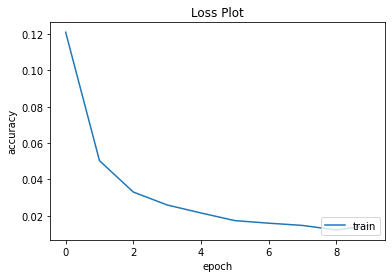

In [16]:
plt.plot(hist.history['loss'])
plt.title("Loss Plot")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 0, '0')

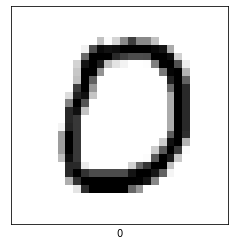

In [17]:
img = X_test[10]
plt.imshow(img.reshape(28, 28), cmap = 'binary')
plt.xticks([])
plt.yticks([])
plt.xlabel(np.argmax(y_test[10]))

In [18]:
pred = model.predict(img.reshape(-1, 28, 28, 1))
print(pred)

[[1.0000000e+00 1.5457162e-27 9.3049720e-15 7.5328705e-29 1.9523048e-29
  3.6212627e-31 9.8276806e-28 6.1798111e-25 1.6262409e-22 4.2357161e-18]]


In [19]:
print("Predicted digit : ", np.argmax(pred))

Predicted digit :  0


# EXPLORATION PART

In [20]:
## Number of filters

filters = [4, 32, 64, 128]
models_filter, history_filter = [], []

for i, f in enumerate(filters):
    model = Sequential()
    model.add(Conv2D(filters = f, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    
    
    models_filter.append(model)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    history_filter.append(hist)
    
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("***********************************************")    


1875/1875 [==============================] - 3s 2ms/step - loss: 0.1924 - accuracy: 0.9440
Model :  0
Training loss :  0.1924014687538147
Training accuracy :  0.9440333247184753
***********************************************
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9802
Model :  1
Training loss :  0.07250899076461792
Training accuracy :  0.9801999926567078
***********************************************
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9842
Model :  2
Training loss :  0.057412292808294296
Training accuracy :  0.9842166900634766
***********************************************
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9887
Model :  3
Training loss :  0.0414435938000679
Training accuracy :  0.9886833429336548
***********************************************


We observe that with the increase in the number of filters the model accuracy increases as more features are captured by different features.

In [21]:
for i, model in enumerate(models_filter):
    print("No. of filters = ", filters[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of filters =  4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of filters =  32
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Para

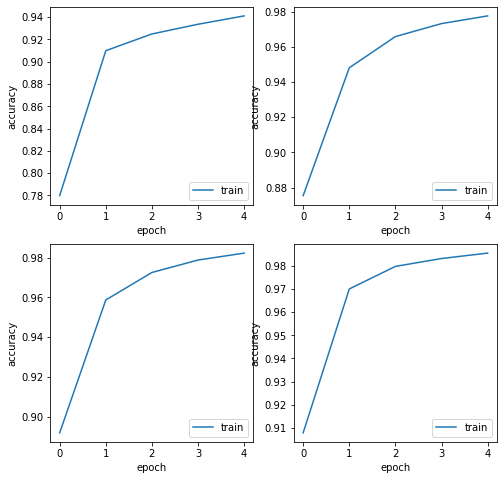

In [22]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

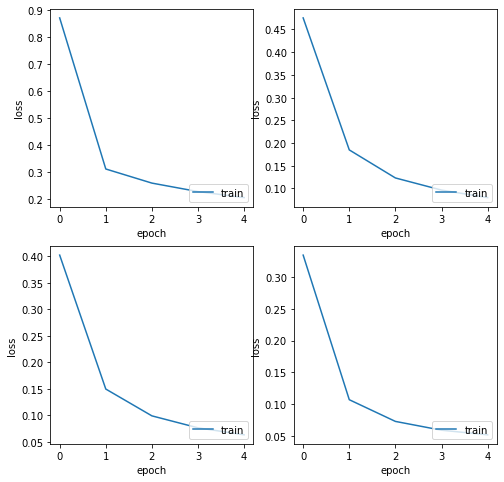

In [23]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

In [24]:
# number of layers

layers = [1, 2, 3, 4]
models_layer, history_layer = [], []

for i, layer in enumerate(layers):
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu', input_shape = (28, 28, 1)))
    for j in range(layer - 1):
        model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, activation = 'relu'))
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation = 'softmax'))
    # model summary
    models_layer.append(model)
    # compiling the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    # fitting the model on training data
    hist = model.fit(X_train, y_train, epochs = 5, batch_size = 256, verbose = 0)
    history_layer.append(hist)
    # evaluation on the training data.
    score = model.evaluate(X_train, y_train)
    print("Model : ", i)
    print("Training loss : ", score[0])
    print("Training accuracy : ", score[1])
    print("-------------------------------------------------") 


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9896
Model :  0
Training loss :  0.04006590694189072
Training accuracy :  0.9895833134651184
-------------------------------------------------
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9938
Model :  1
Training loss :  0.022897955030202866
Training accuracy :  0.9938333630561829
-------------------------------------------------
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - accuracy: 0.9949
Model :  2
Training loss :  0.017139790579676628
Training accuracy :  0.9948999881744385
-------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9947
Model :  3
Training loss :  0.01788543350994587
Training accuracy :  0.9946666955947876
-------------------------------------------------


In [25]:
# plotting the model summaries

for i, model in enumerate(models_filter):
    print("No. of Conv Layers = ", layers[i])
    model.summary()
    print("-------------------------------------------------------------")

No. of Conv Layers =  1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6770      
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
-------------------------------------------------------------
No. of Conv Layers =  2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape           

Again we can observe that with the increase in the number of layers, the model accuracy increases a bit. Also the amount of trainable parameters increases a lot thereby increasing the training time.

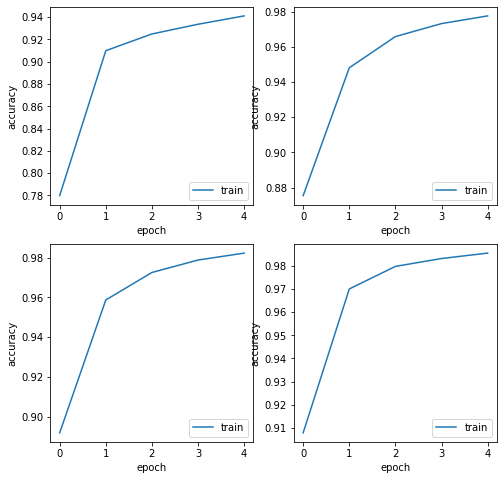

In [26]:
# plotting the accuracy curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

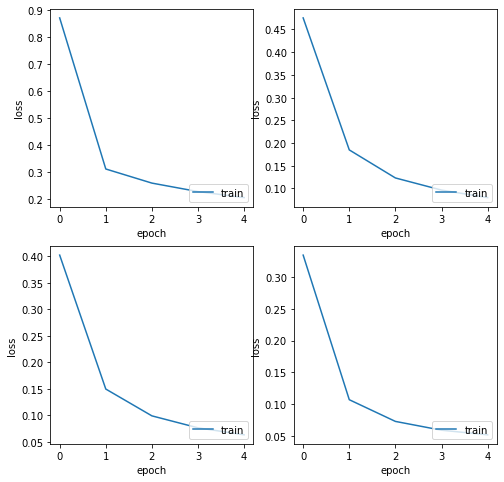

In [27]:
# plotting the loss curve

plt.figure(figsize = (8, 8))
for i in range(len(history_filter)):
    plt.subplot(2, 2, i + 1)
    plt.plot(history_filter[i].history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='lower right')
plt.show()

Text(0.5, 0, 'Actual digit : 9')

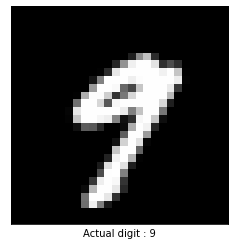

In [28]:
# testing on unseen data

img = X_test[20]
plt.imshow(img.reshape(28, 28), cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.xlabel("Actual digit : " + str(np.argmax(y_test[20])))

In [29]:
for i, model in enumerate(models_filter):
    pred = model.predict(img.reshape(-1, 28, 28, 1))
    print("Model : ", i + 1)
    print("No of filters : ", filters[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of filters :  4
Predicted digit :  9
----------------------------------------
Model :  2
No of filters :  32
Predicted digit :  9
----------------------------------------
Model :  3
No of filters :  64
Predicted digit :  9
----------------------------------------
Model :  4
No of filters :  128
Predicted digit :  9
----------------------------------------


In [30]:
for i, model in enumerate(models_filter):
    pred = model.predict(img.reshape(-1, 28, 28, 1))
    print("Model : ", i + 1)
    print("No of layers : ", layers[i])
    print("Predicted digit : ", np.argmax(pred))
    print("----------------------------------------")

Model :  1
No of layers :  1
Predicted digit :  9
----------------------------------------
Model :  2
No of layers :  2
Predicted digit :  9
----------------------------------------
Model :  3
No of layers :  3
Predicted digit :  9
----------------------------------------
Model :  4
No of layers :  4
Predicted digit :  9
----------------------------------------
